<a href="https://colab.research.google.com/github/S-AILAB/Diamond-Price-Analysis-using-Random-Forest/blob/main/Random_Forest_Regression_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Diamond Price Prediction Regression**
**Business Problem**
Analyze the relationship between diamond attributes and their prices to predict the price of a diamond using Random Forest Regression. This involves identifying significant predictors and building a robust predictive model.


##Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
# confusion_matrix, accuracy_score, classification_report, precision_score, recall_score for Classification problem

##Loading Data

In [ ]:
df = pd.read_csv('/content/diamonds.csv')

##Data Dictionary


In [ ]:
df.head(5)

Unnamed: 0  carat      cut color clarity  depth  table  price     x     y  \
0           1   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98   
1           2   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84   
2           3   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07   
3           4   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23   
4           5   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35   

      z  
0  2.43  
1  2.31  
2  2.31  
3  2.63  
4  2.75

In [ ]:
df.tail(5)

Unnamed: 0  carat        cut color clarity  depth  table  price     x  \
53935       53936   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75   
53936       53937   0.72       Good     D     SI1   63.1   55.0   2757  5.69   
53937       53938   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66   
53938       53939   0.86    Premium     H     SI2   61.0   58.0   2757  6.15   
53939       53940   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83   

          y     z  
53935  5.76  3.50  
53936  5.75  3.61  
53937  5.68  3.56  
53938  6.12  3.74  
53939  5.87  3.64

In [ ]:
df.shape

(53940, 11)

In [ ]:
df.size

593340

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [ ]:
df.describe()

Unnamed: 0         carat         depth         table         price  \
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000   
mean   26970.500000      0.797940     61.749405     57.457184   3932.799722   
std    15571.281097      0.474011      1.432621      2.234491   3989.439738   
min        1.000000      0.200000     43.000000     43.000000    326.000000   
25%    13485.750000      0.400000     61.000000     56.000000    950.000000   
50%    26970.500000      0.700000     61.800000     57.000000   2401.000000   
75%    40455.250000      1.040000     62.500000     59.000000   5324.250000   
max    53940.000000      5.010000     79.000000     95.000000  18823.000000   

                  x             y             z  
count  53940.000000  53940.000000  53940.000000  
mean       5.731157      5.734526      3.538734  
std        1.121761      1.142135      0.705699  
min        0.000000      0.000000      0.000000  
25%        4.710000      4.720000      2.910000  
50%        5.700000      5.710000      3.530000  
75%        6.540000      6.540000      4.040000  
max       10.740000     58.900000     31.800000

##Data Preprocessing

In [ ]:
df.columns

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table',
       'price', 'x', 'y', 'z'],
      dtype='object')

###Column editing

In [ ]:
df = df.drop('Unnamed: 0', axis = 1)
display(df)

carat        cut color clarity  depth  table  price     x     y     z
0       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2       0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...
53935   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50
53936   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61
53937   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56
53938   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74
53939   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64

[53940 rows x 10 columns]

In [ ]:
#column rename
df = df.rename(columns = {
    'carat': 'Carat',
    'cut': 'Cut',
    'color': 'Color',
    'clarity': 'Clarity',
    'depth': 'Total_Depth_Percentage',
    'table': 'Table',
    'price': 'Price',
    'x': 'Length',
    'y': 'Width',
    'z': 'Depth'
})

In [ ]:
df.columns

Index(['Carat', 'Cut', 'Color', 'Clarity', 'Total_Depth_Percentage', 'Table',
       'Price', 'Length', 'Width', 'Depth'],
      dtype='object')

###Data Cleaning

In [ ]:
df.isnull().sum()

Carat                     0
Cut                       0
Color                     0
Clarity                   0
Total_Depth_Percentage    0
Table                     0
Price                     0
Length                    0
Width                     0
Depth                     0
dtype: int64

In [ ]:
#checking duplicates
df.duplicated().sum()

np.int64(146)

In [ ]:
#Finding out which all rows have duplicate values
duplicate = df[df.duplicated()]
print(duplicate)

       Carat    Cut Color Clarity  Total_Depth_Percentage  Table  Price  \
1005    0.79  Ideal     G     SI1                    62.3   57.0   2898   
1006    0.79  Ideal     G     SI1                    62.3   57.0   2898   
1007    0.79  Ideal     G     SI1                    62.3   57.0   2898   
1008    0.79  Ideal     G     SI1                    62.3   57.0   2898   
2025    1.52   Good     E      I1                    57.3   58.0   3105   
...      ...    ...   ...     ...                     ...    ...    ...   
47969   0.52  Ideal     D     VS2                    61.8   55.0   1919   
49326   0.51  Ideal     F    VVS2                    61.2   56.0   2093   
49557   0.71   Good     F     SI2                    64.1   60.0   2130   
50079   0.51  Ideal     F    VVS2                    61.2   56.0   2203   
52861   0.50   Fair     E     VS2                    79.0   73.0   2579   

       Length  Width  Depth  
1005     5.90   5.85   3.66  
1006     5.90   5.85   3.66  
1007     

In [ ]:
#finding the percentage of duplicate data
duplicate_data_percentage = round(df.duplicated().sum()/len(df)*100,4)
print(f'Total duplicate percentage: {duplicate_data_percentage}%')

Total duplicate percentage: 0.2707%


Since the percentage of duplicate data is not more than 1% we can easily drop it as it wont hamper our overall data.

In [ ]:
#dropping duplicated
df = df.drop_duplicates().reset_index(drop = True)

In [ ]:
df.shape

(53794, 10)

This is the new shape of our dataframe.

###Outlier treatment

In [ ]:
def outlier_treatment(df):
  num_cols = df.select_dtypes(include = np.number).columns
  num_cols = num_cols.drop('Price')
  print(num_cols)

#boxplot before outlier treatment
  for col in num_cols:
    print(f"Working on column: {col}")
    print(f"Column dtype: {df[col].dtype}")
    print(f"Number of unique values: {df[col].nunique()}")
    plt.figure(figsize = (6,6))
    sns.boxplot(data = df, x = col)
    plt.title(f'Boxplot before outlier treatment--{col}')
    plt.show()

#Outlier treatment-- IQR calculation
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
    # df[col] = pd.Series(np.where(df[col]>upper_bound, upper_bound,
    #                              np.where(df[col]<lower_bound, lower_bound, df[col])), index = df.index)


#boxplot before outlier treatment
    plt.figure(figsize = (6,6))
    sns.boxplot(data = df, x = col)
    plt.title(f'Boxplot after outlier treatment--{col}')

  return


Index(['Carat', 'Total_Depth_Percentage', 'Table', 'Length', 'Width', 'Depth'], dtype='object')
Working on column: Carat
Column dtype: float64
Number of unique values: 273
Sample data:
0    0.23
1    0.21
2    0.23
3    0.29
4    0.31
Name: Carat, dtype: float64


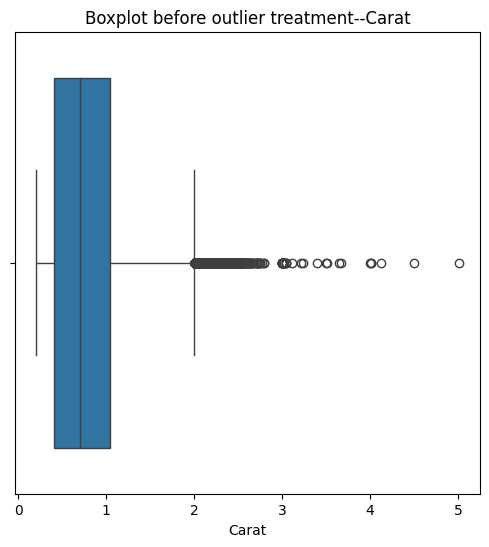

Working on column: Total_Depth_Percentage
Column dtype: float64
Number of unique values: 184
Sample data:
0    61.5
1    59.8
2    56.9
3    62.4
4    63.3
Name: Total_Depth_Percentage, dtype: float64


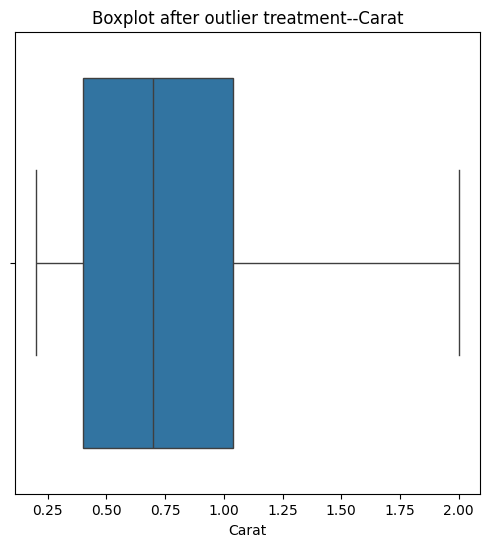

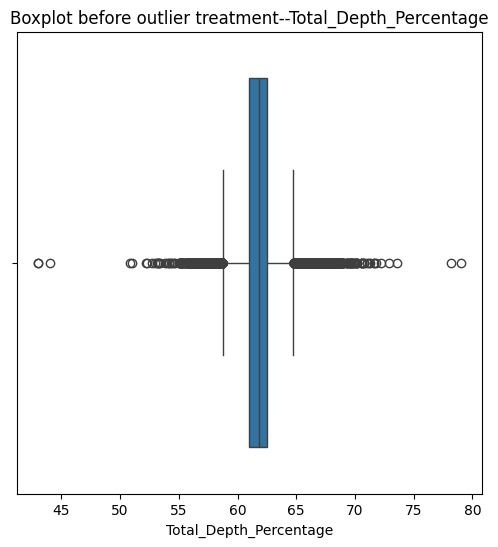

Working on column: Table
Column dtype: float64
Number of unique values: 127
Sample data:
0    55.0
1    61.0
2    65.0
3    58.0
4    58.0
Name: Table, dtype: float64


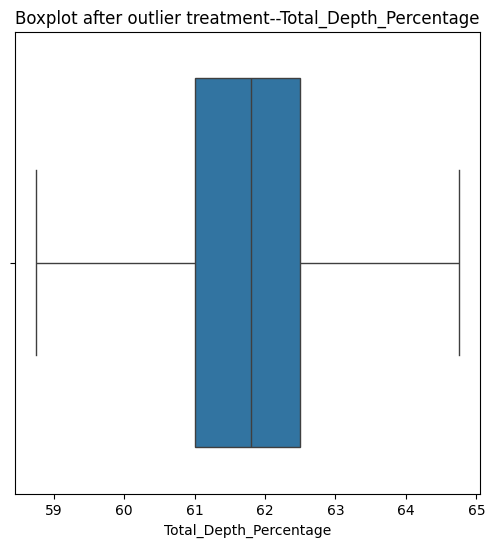

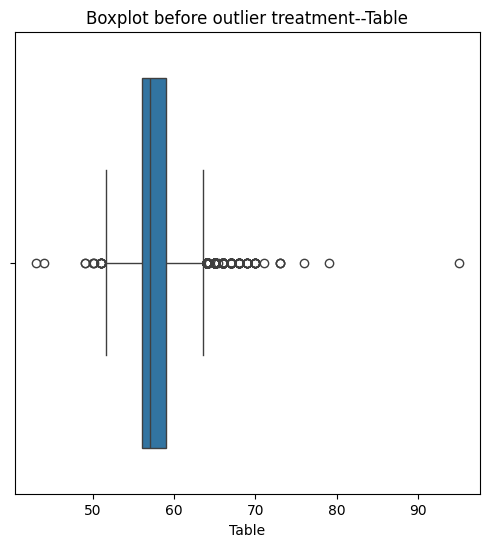

Working on column: Length
Column dtype: float64
Number of unique values: 554
Sample data:
0    3.95
1    3.89
2    4.05
3    4.20
4    4.34
Name: Length, dtype: float64


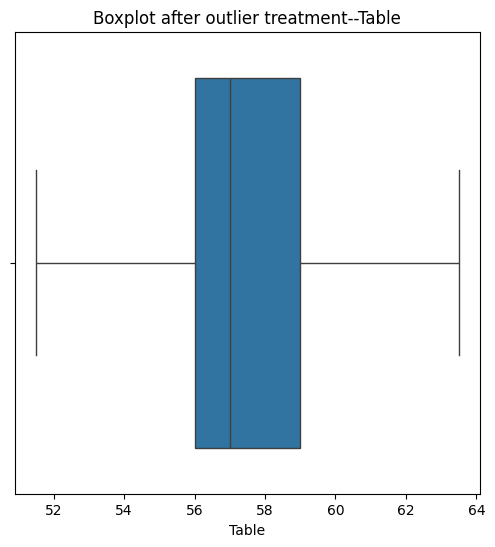

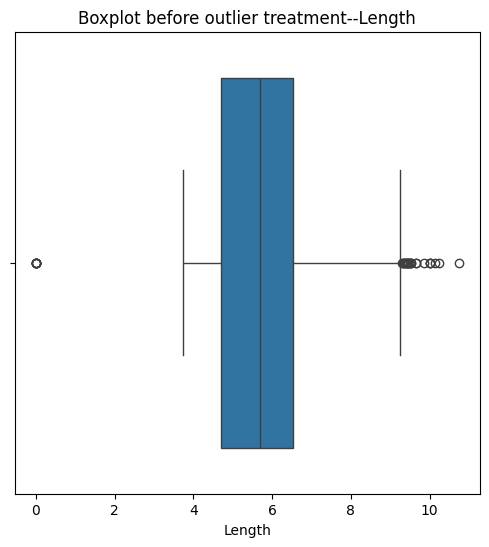

Working on column: Width
Column dtype: float64
Number of unique values: 552
Sample data:
0    3.98
1    3.84
2    4.07
3    4.23
4    4.35
Name: Width, dtype: float64


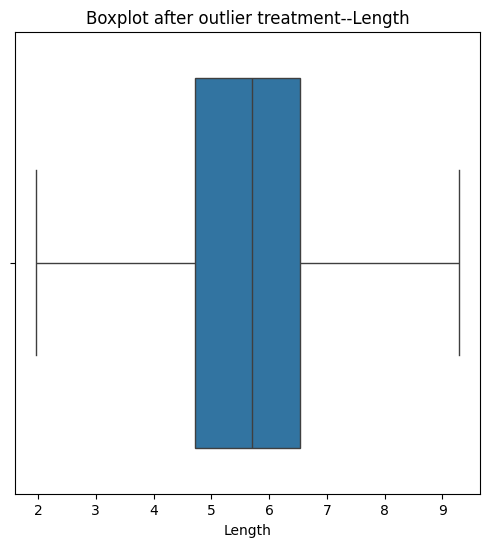

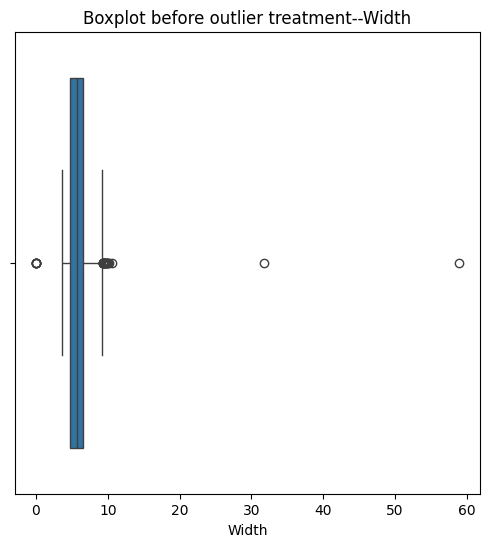

Working on column: Depth
Column dtype: float64
Number of unique values: 375
Sample data:
0    2.43
1    2.31
2    2.31
3    2.63
4    2.75
Name: Depth, dtype: float64


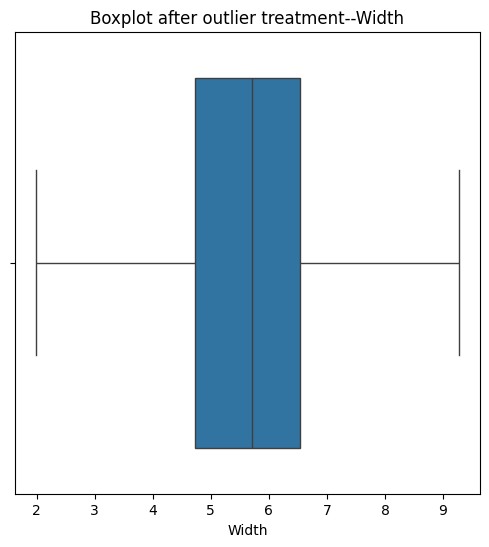

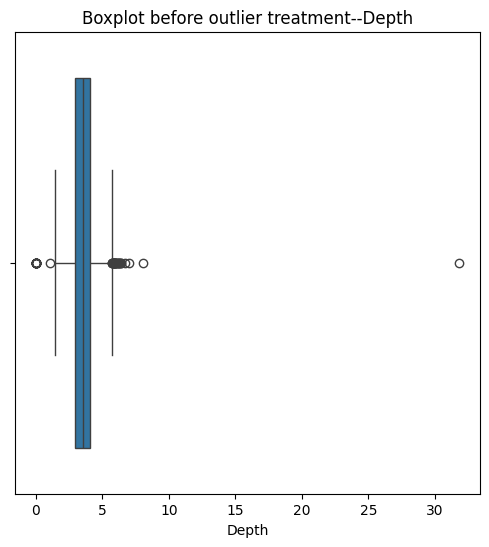

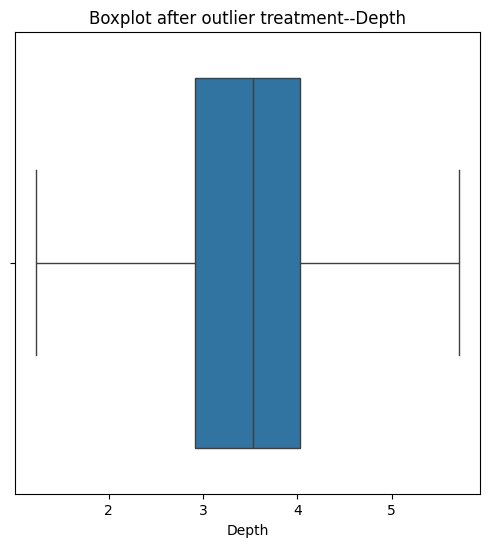

In [ ]:
outlier_treatment(df)

##EDA

In [ ]:
df.describe()

Carat  Total_Depth_Percentage         Table         Price  \
count  53794.000000            53794.000000  53794.000000  53794.000000   
mean       0.792471               61.748112     57.439612   3933.065082   
std        0.456694                1.269642      2.160989   3988.114460   
min        0.200000               58.750000     51.500000    326.000000   
25%        0.400000               61.000000     56.000000    951.000000   
50%        0.700000               61.800000     57.000000   2401.000000   
75%        1.040000               62.500000     59.000000   5326.750000   
max        2.000000               64.750000     63.500000  18823.000000   

             Length         Width         Depth  
count  53794.000000  53794.000000  53794.000000  
mean       5.731306      5.733398      3.538454  
std        1.119038      1.111074      0.691833  
min        1.965000      1.990000      1.230000  
25%        4.710000      4.720000      2.910000  
50%        5.700000      5.710000      3.530000  
75%        6.540000      6.540000      4.030000  
max        9.285000      9.270000      5.710000

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53794 entries, 0 to 53793
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Carat                   53794 non-null  float64
 1   Cut                     53794 non-null  object 
 2   Color                   53794 non-null  object 
 3   Clarity                 53794 non-null  object 
 4   Total_Depth_Percentage  53794 non-null  float64
 5   Table                   53794 non-null  float64
 6   Price                   53794 non-null  int64  
 7   Length                  53794 non-null  float64
 8   Width                   53794 non-null  float64
 9   Depth                   53794 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [ ]:
num_cols = df.select_dtypes(include = np.number).columns
num_cols

Index(['Carat', 'Total_Depth_Percentage', 'Table', 'Price', 'Length', 'Width',
       'Depth'],
      dtype='object')

###Univariate analysis

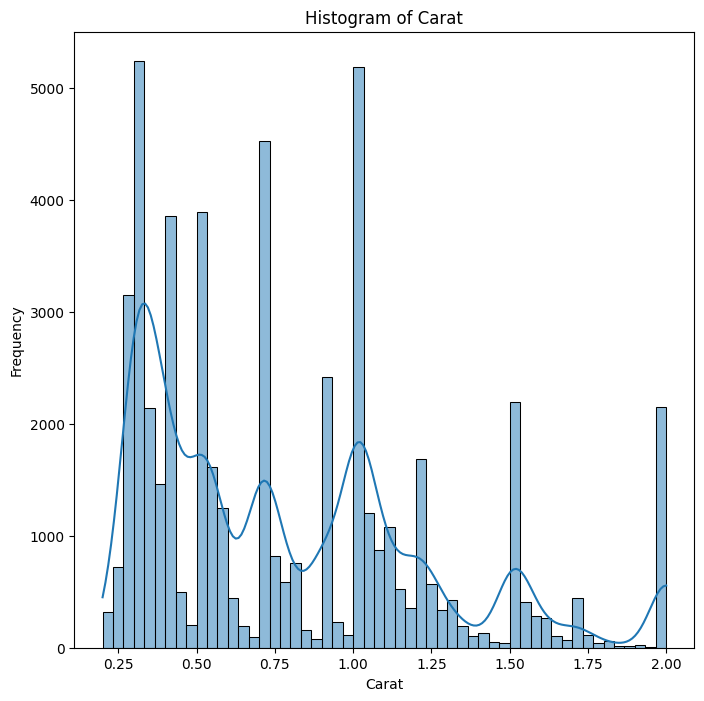

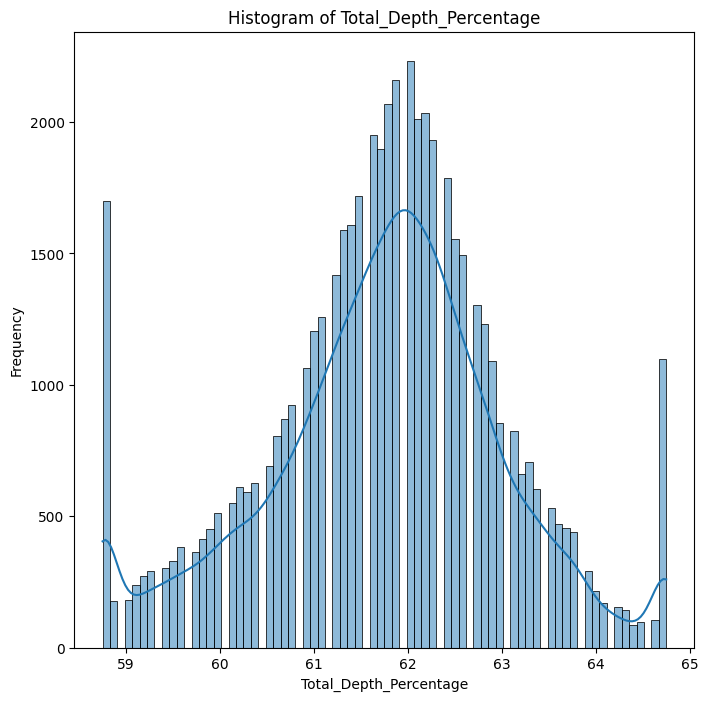

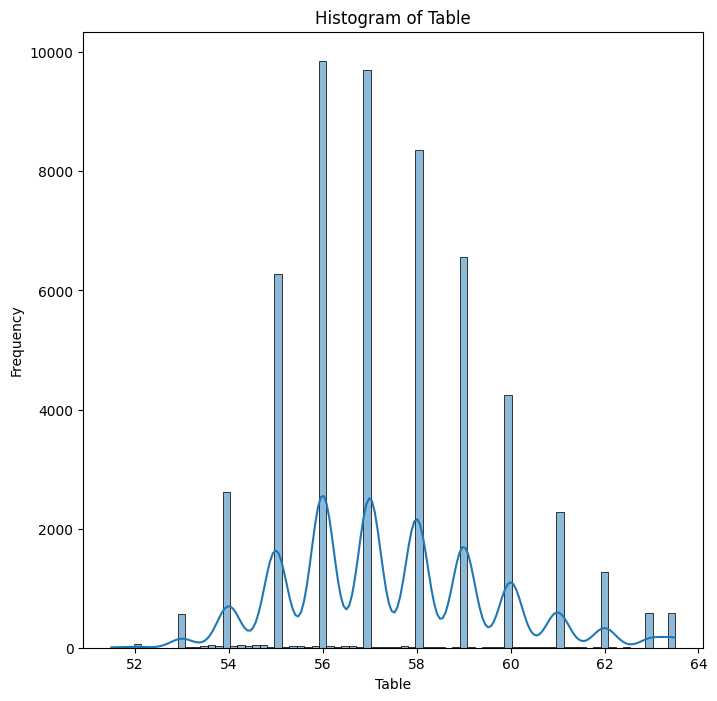

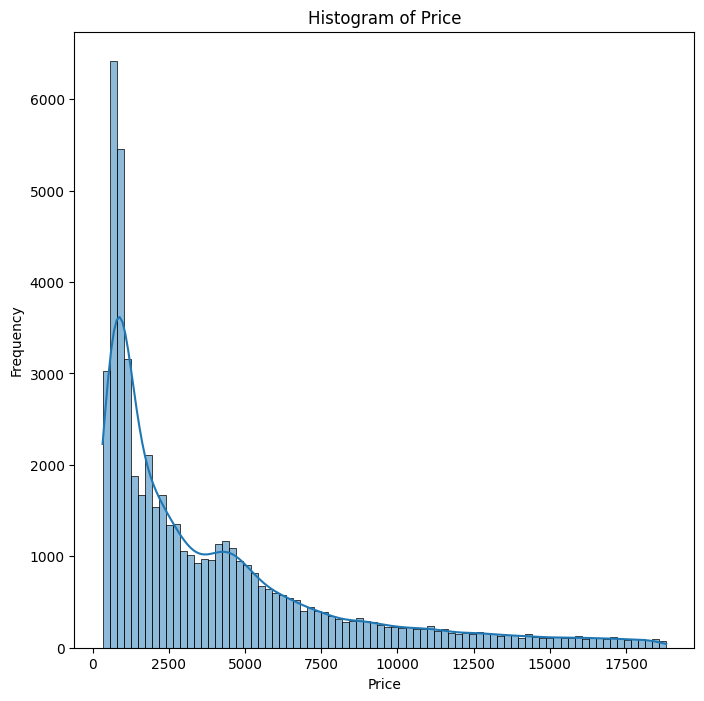

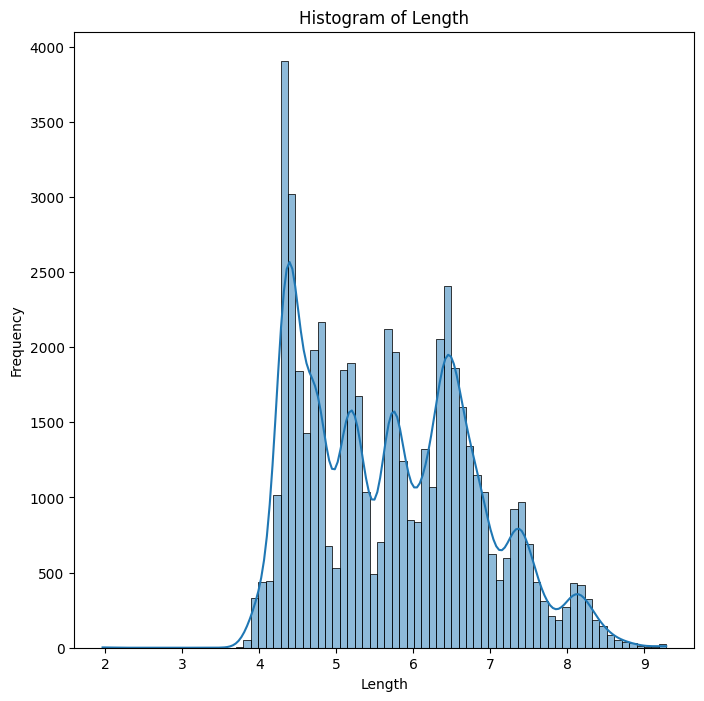

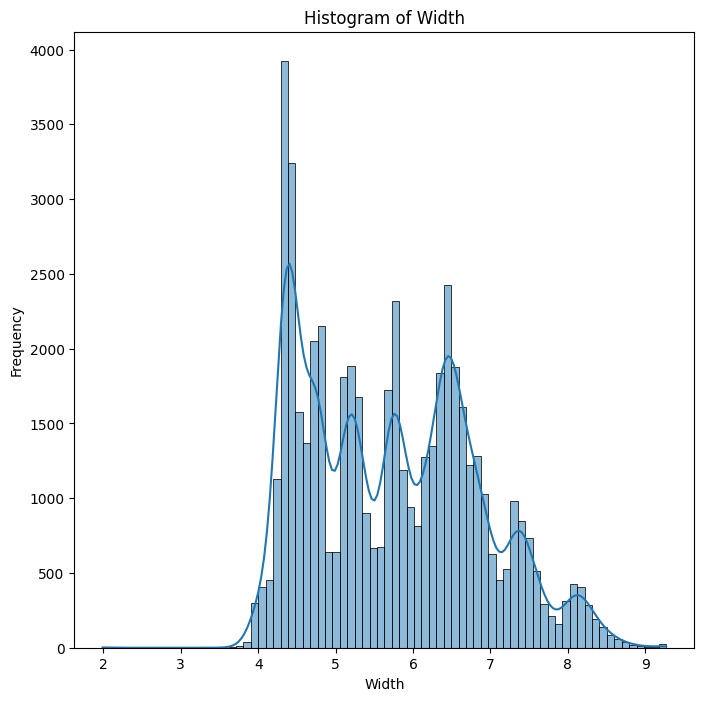

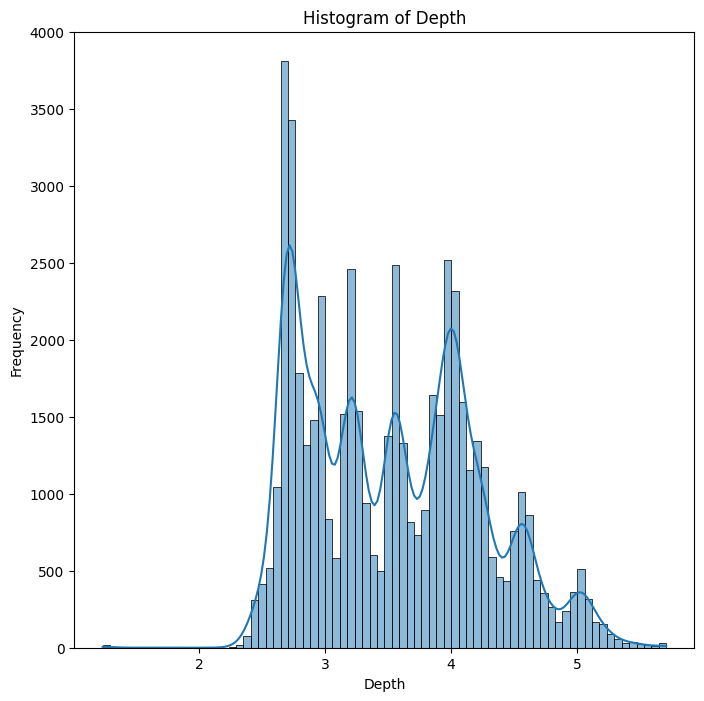

In [ ]:
for col in num_cols:
  plt.figure(figsize = (8,8))
  sns.histplot(data = df, x = col, kde = True)
  plt.title(f'Histogram of {col}')
  plt.xlabel(col)
  plt.ylabel('Frequency')
  plt.show()

###Bi-Variate Analysis

In [ ]:
num_cols = num_cols.drop('Price')
num_cols

Index(['Carat', 'Total_Depth_Percentage', 'Table', 'Length', 'Width', 'Depth'], dtype='object')

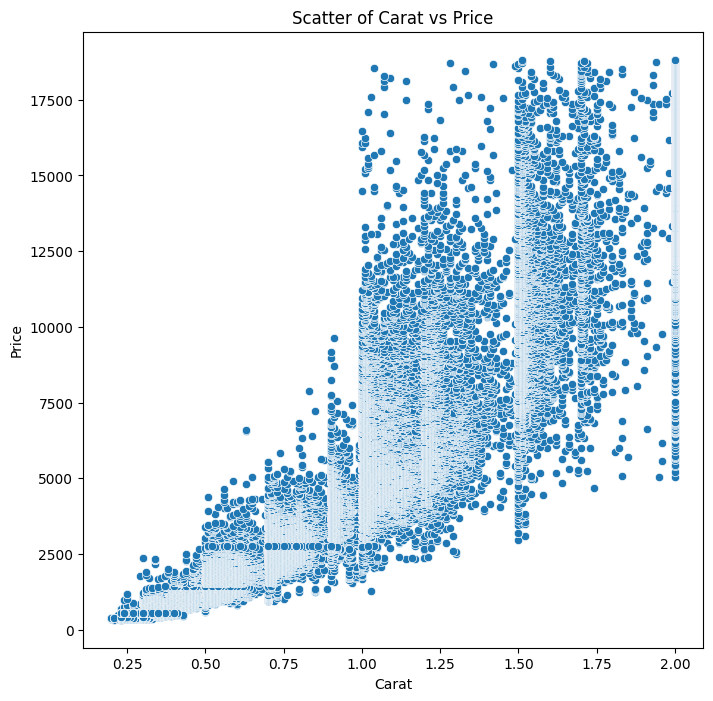

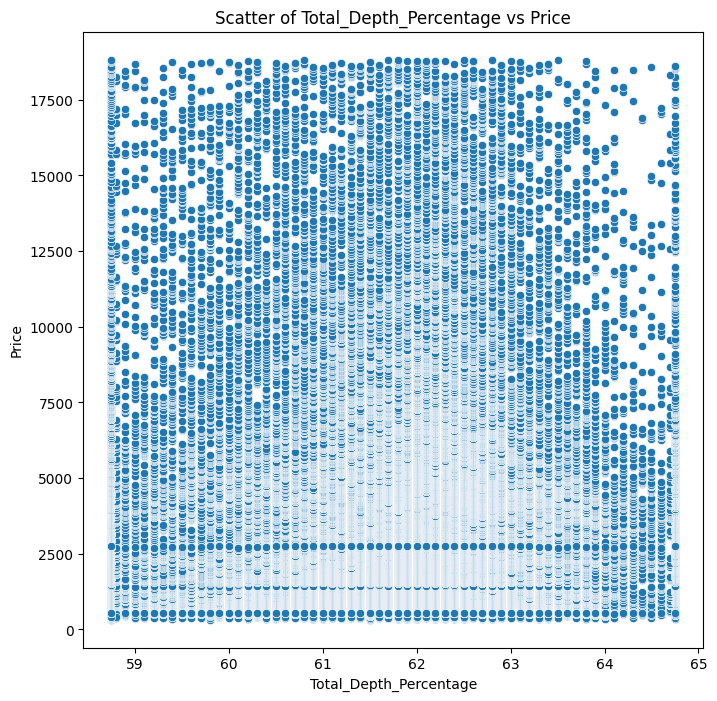

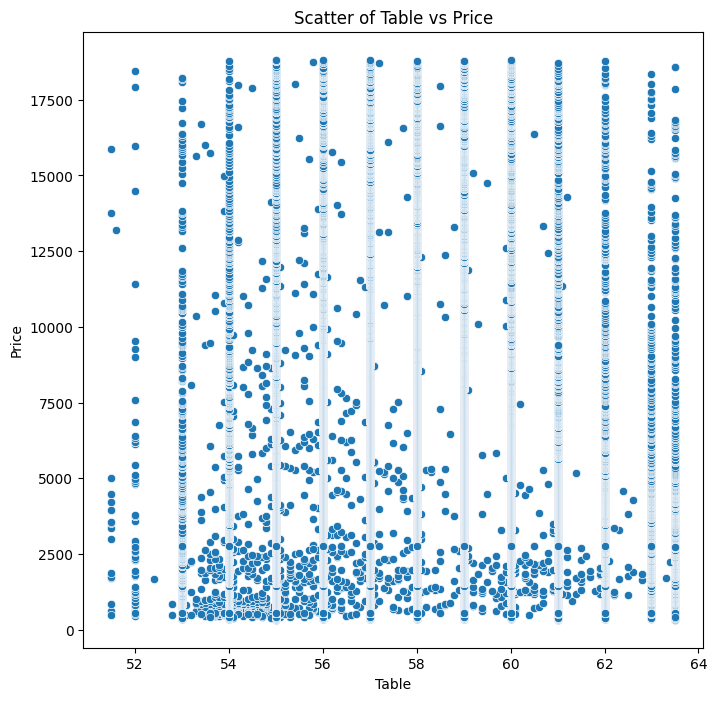

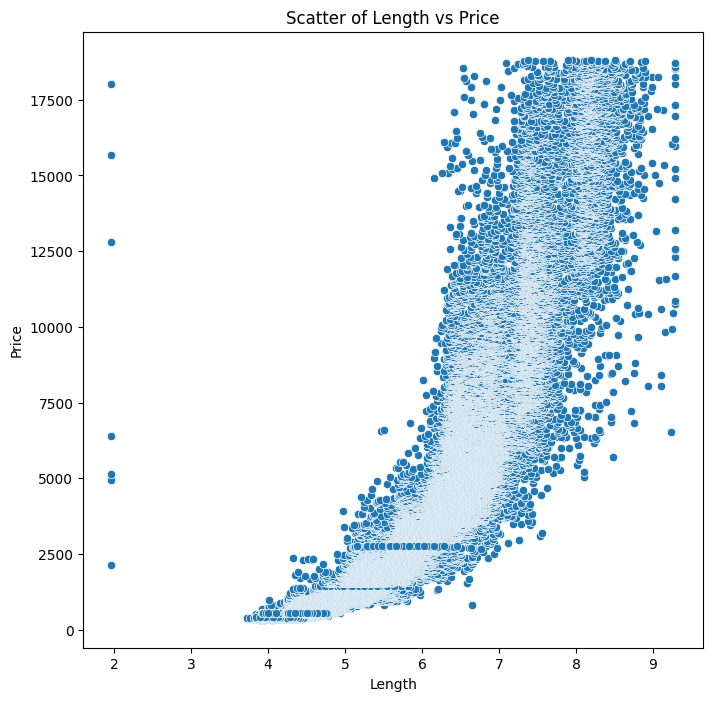

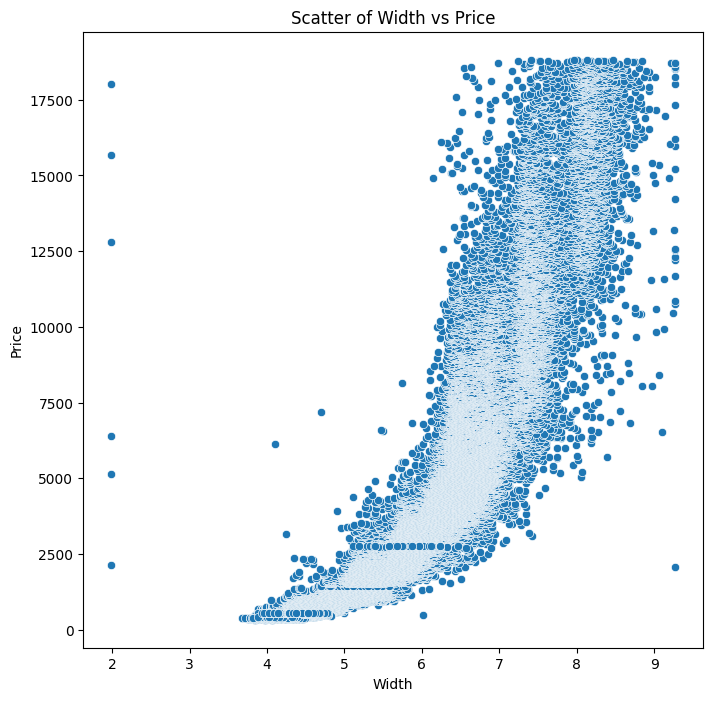

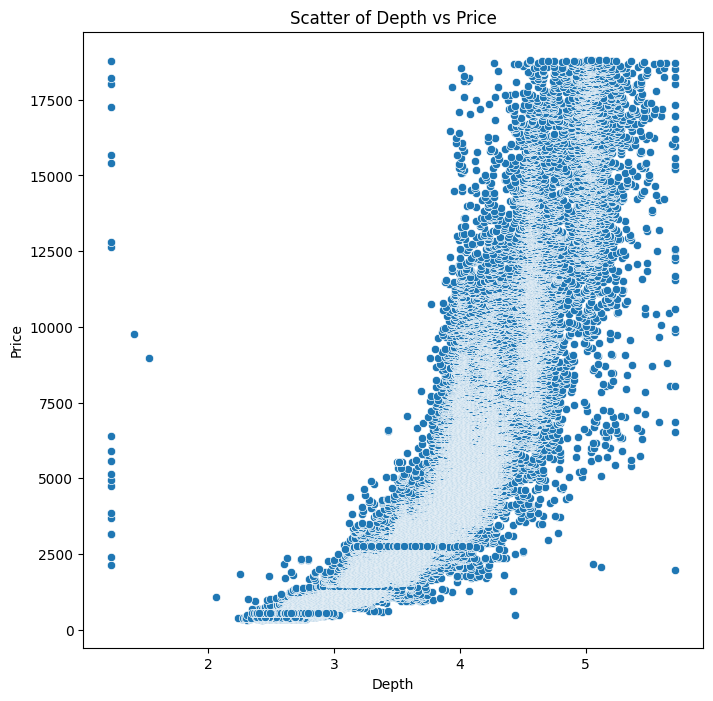

In [ ]:
for col in num_cols:
  plt.figure(figsize=(8,8))
  sns.scatterplot(data = df, x = col, y = 'Price')
  plt.title(f'Scatter of {col} vs Price')
  plt.xlabel(col)
  plt.ylabel('Price')
  plt.show()

In [ ]:
cat_cols = df.select_dtypes(exclude = np.number).columns
cat_cols

Index(['Cut', 'Color', 'Clarity'], dtype='object')

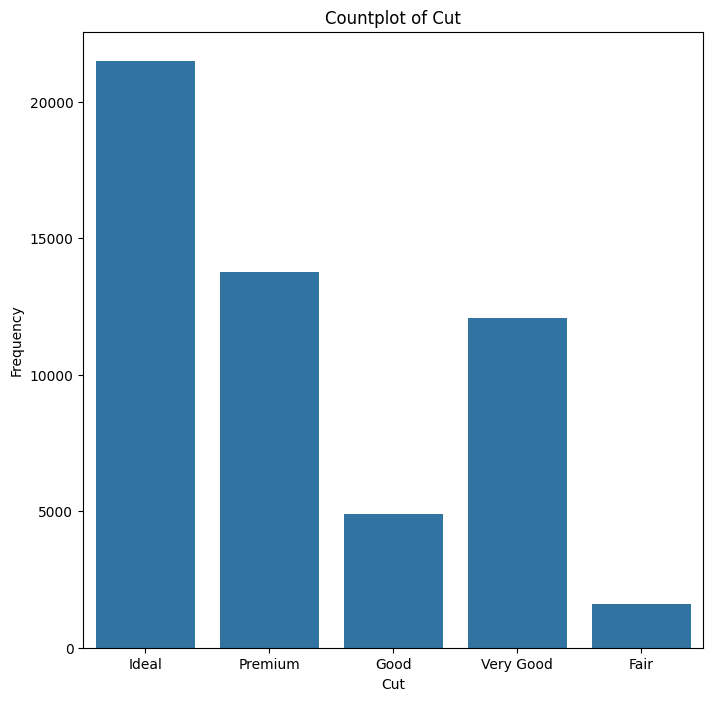

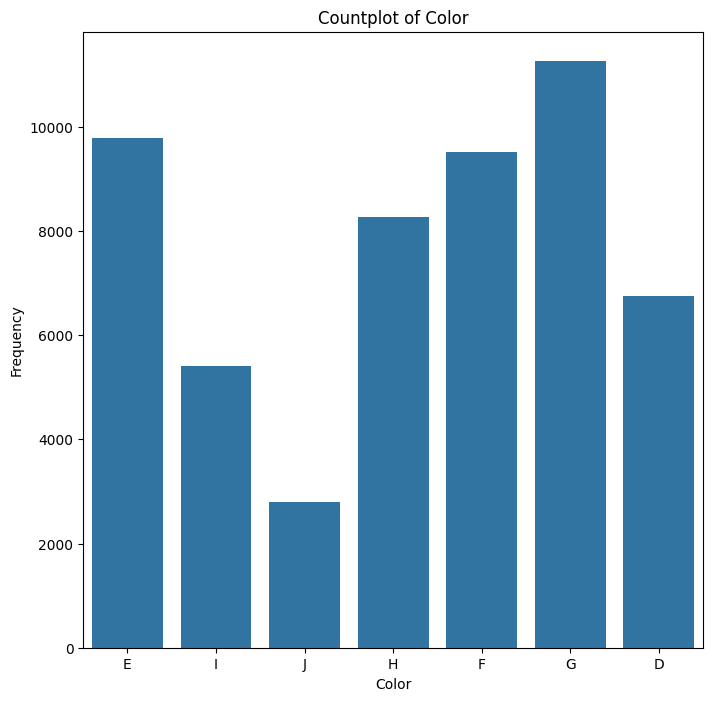

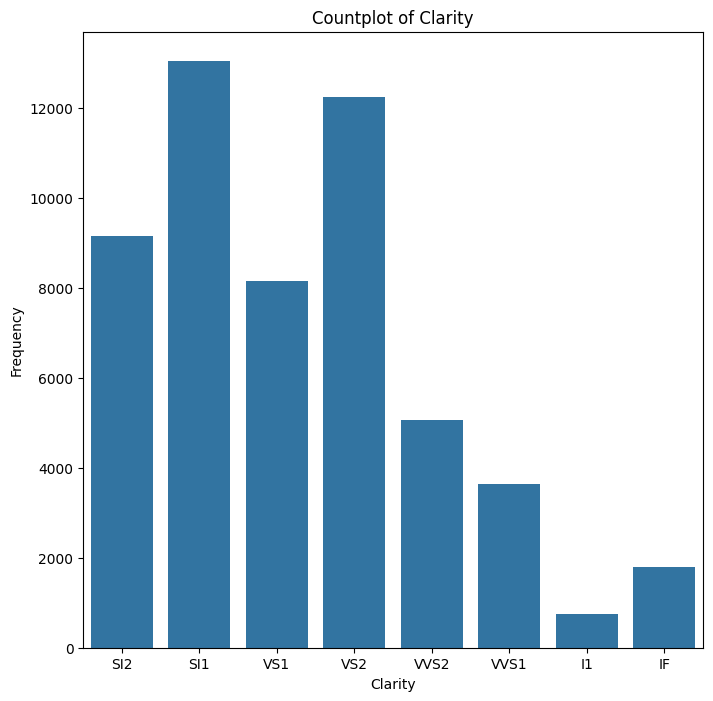

In [ ]:
for col in cat_cols:
  plt.figure(figsize = (8,8))
  sns.countplot(data = df, x = col)
  plt.title(f'Countplot of {col}')
  plt.xlabel(col)
  plt.ylabel('Frequency')

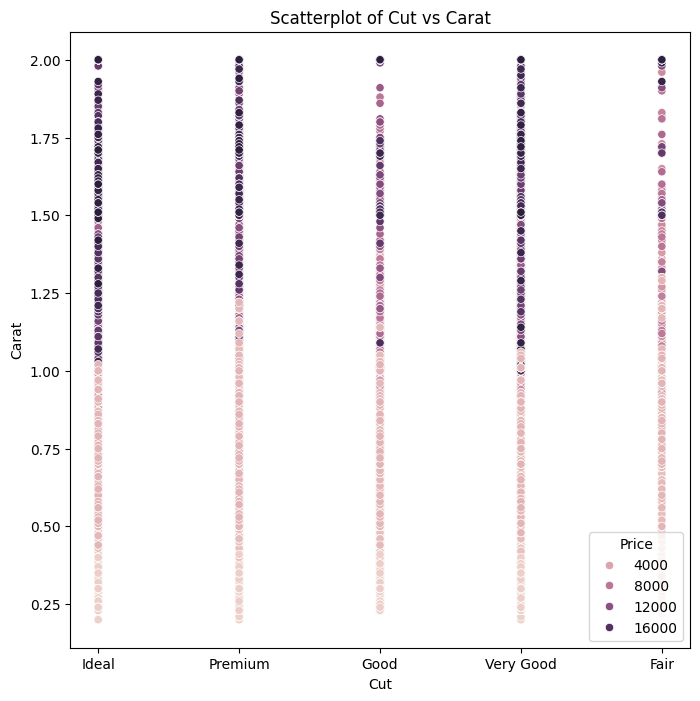

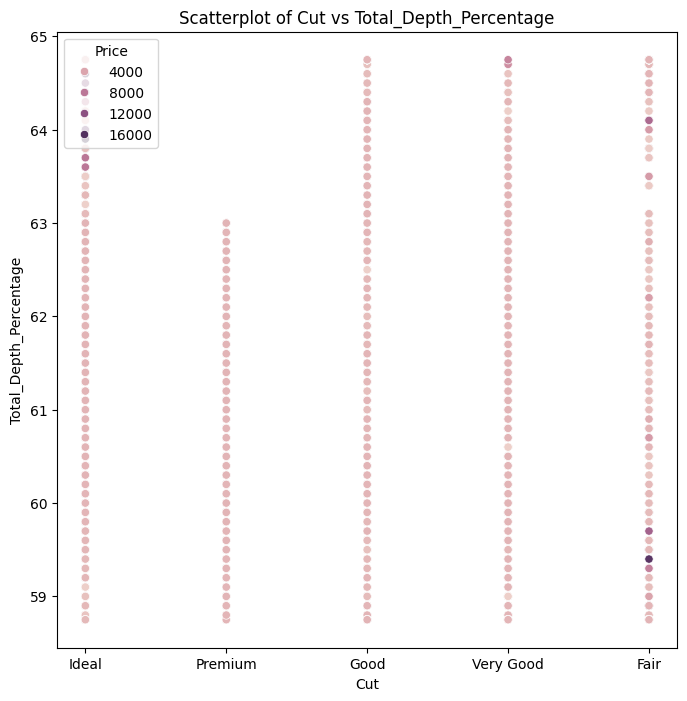

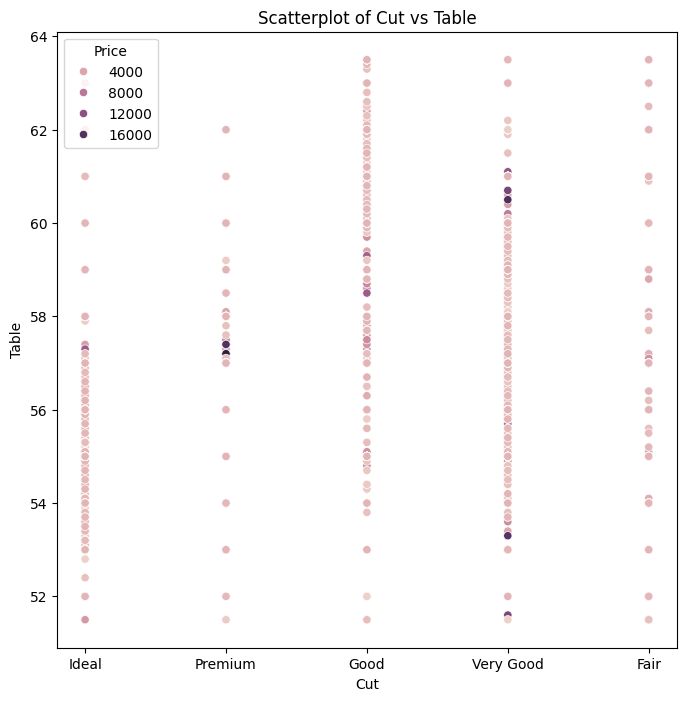

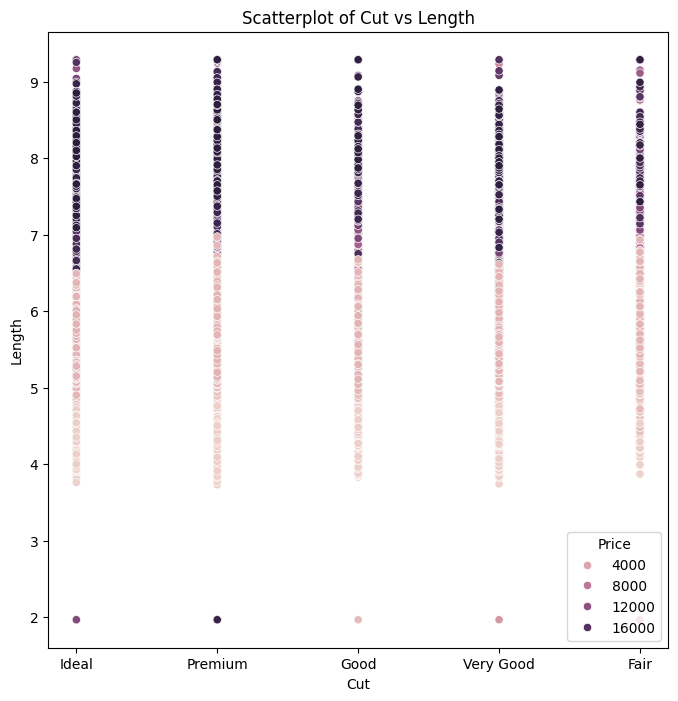

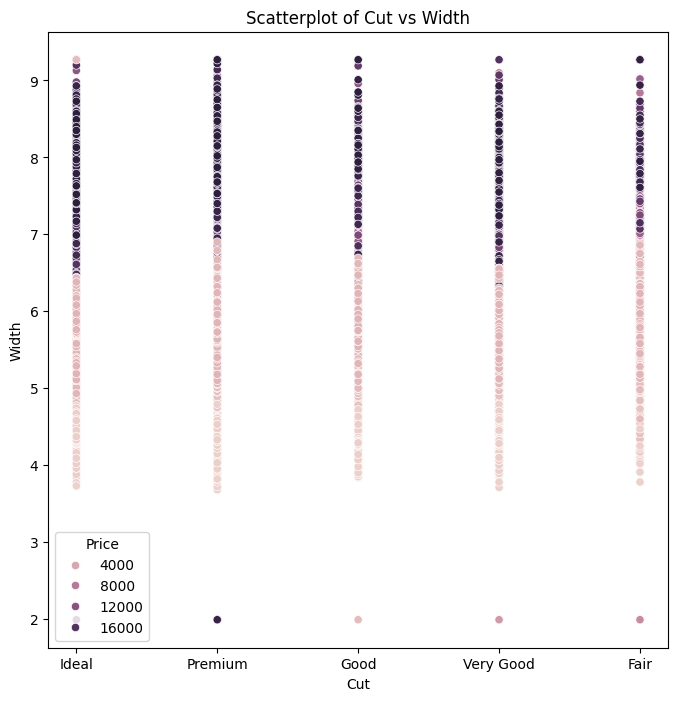

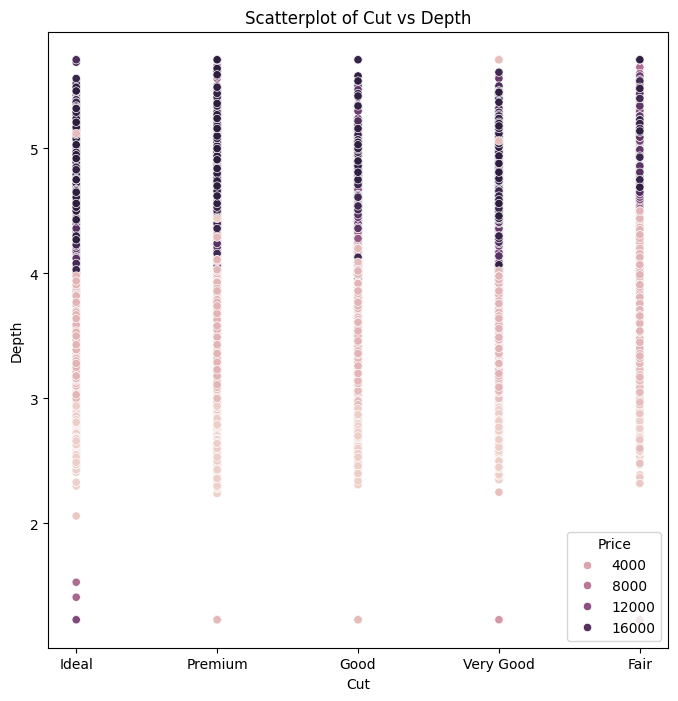

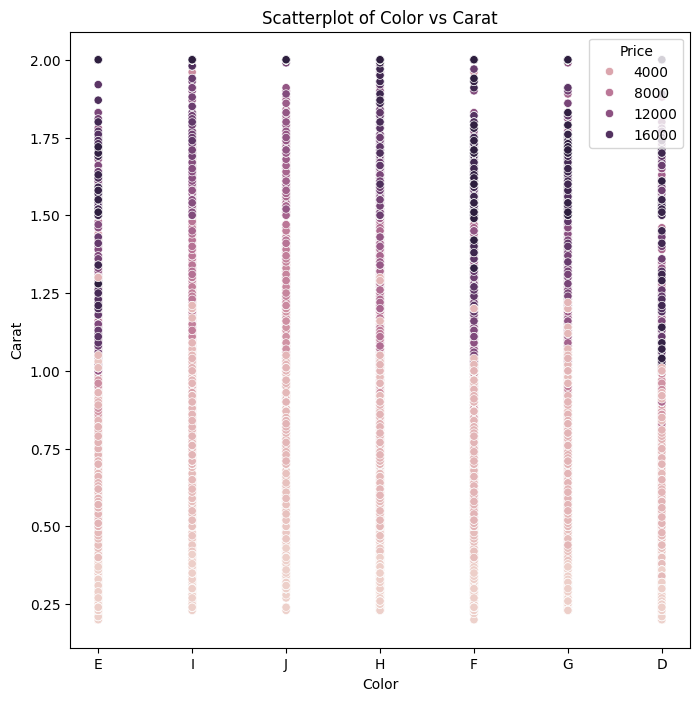

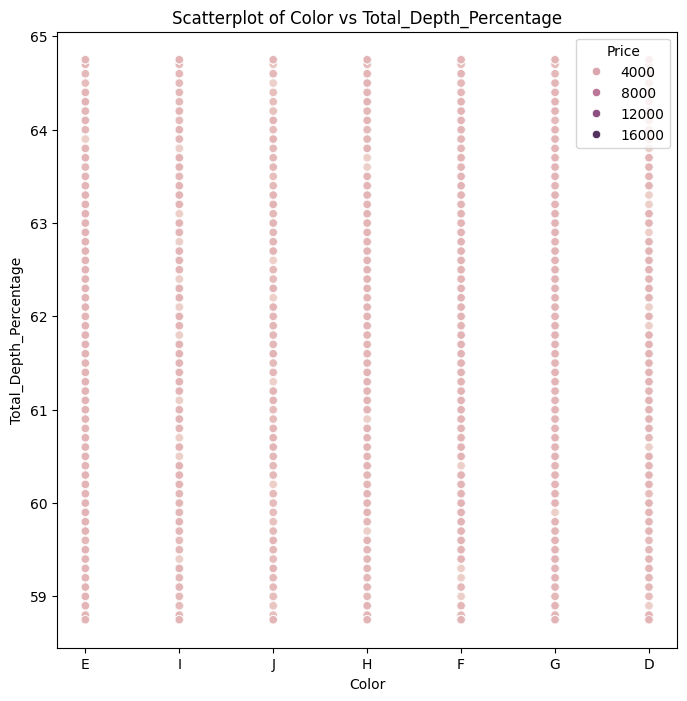

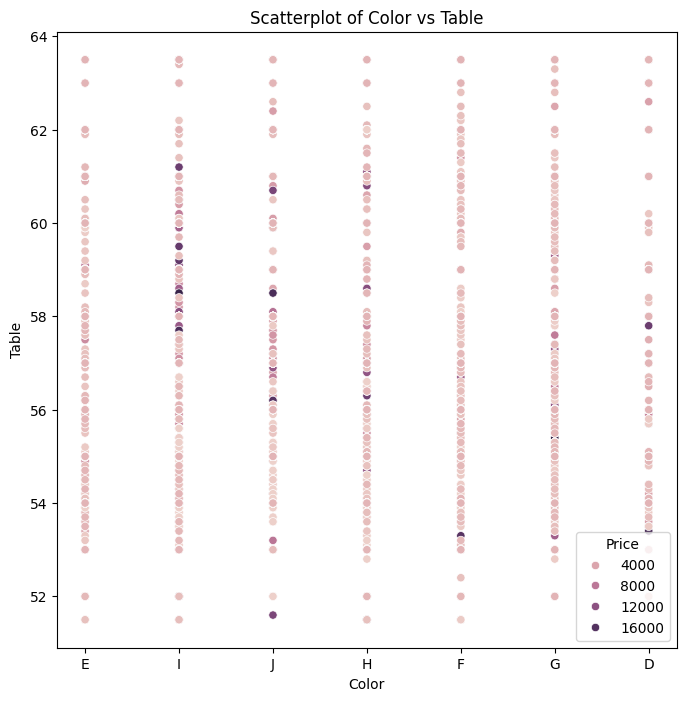

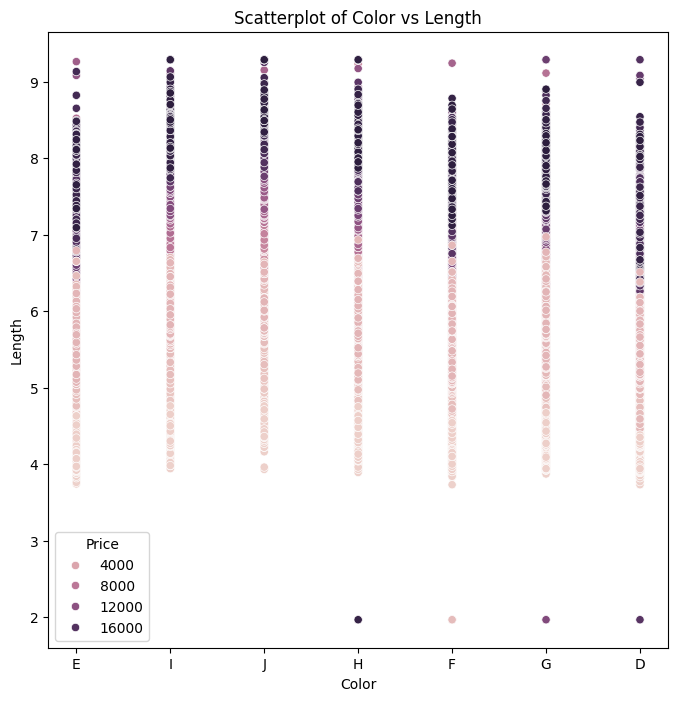

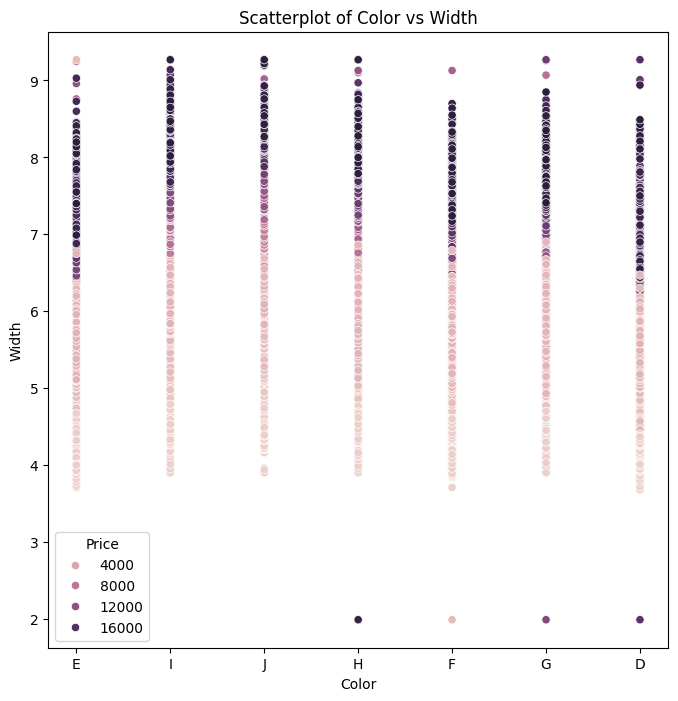

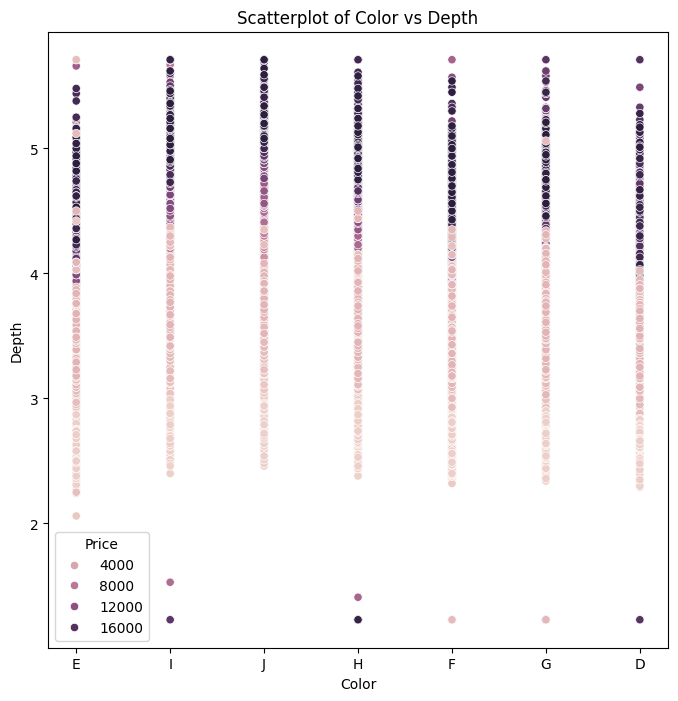

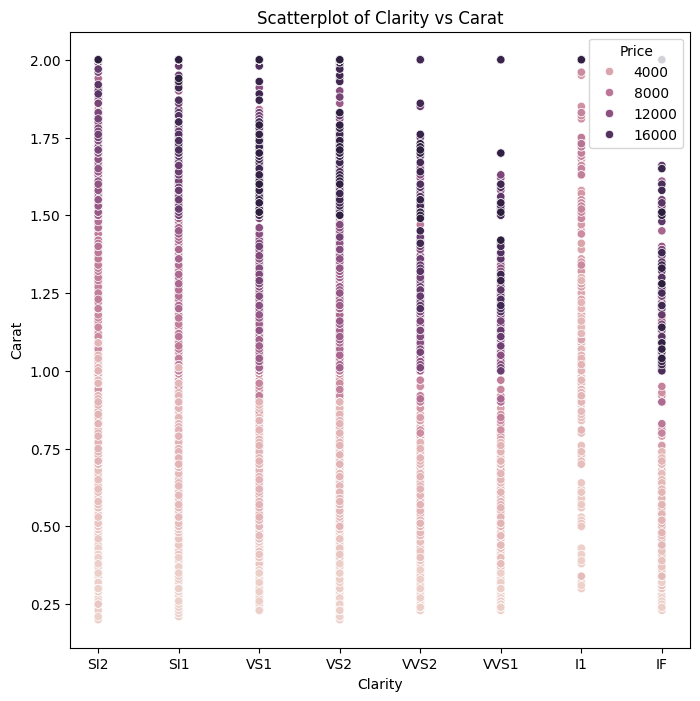

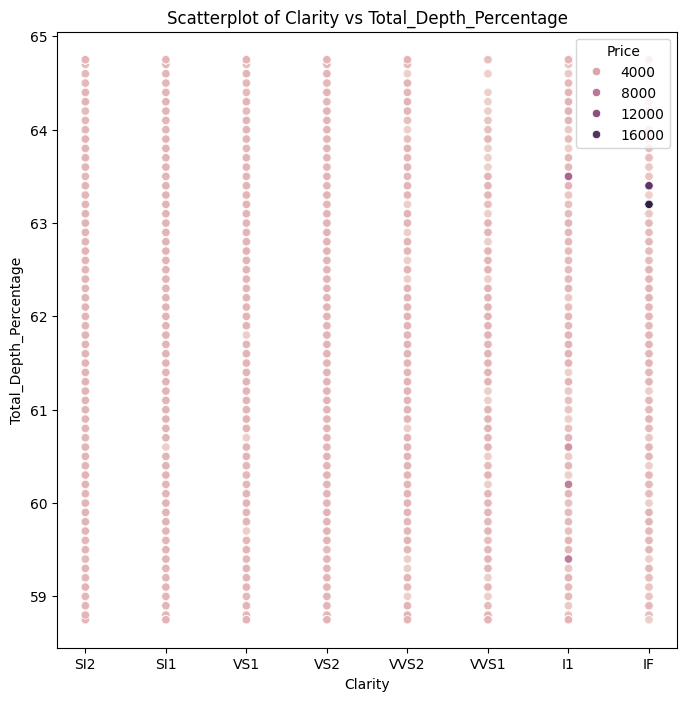

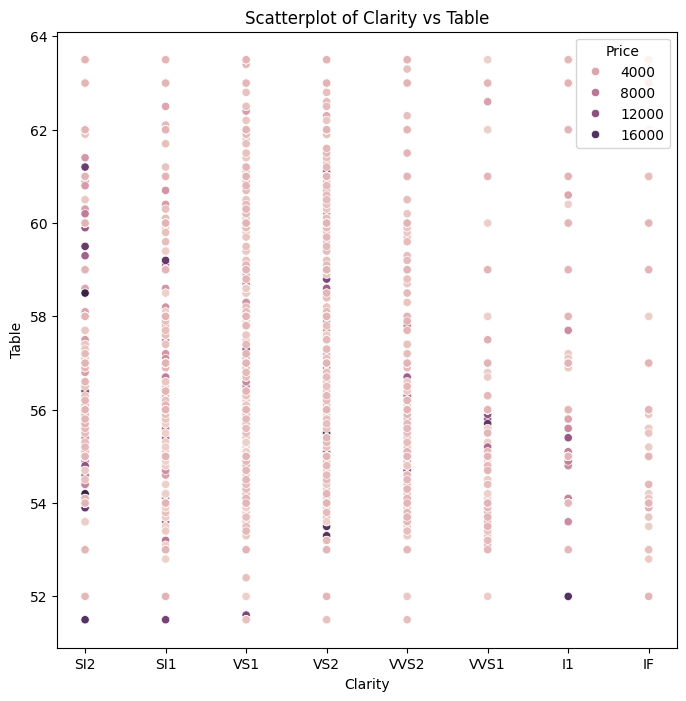

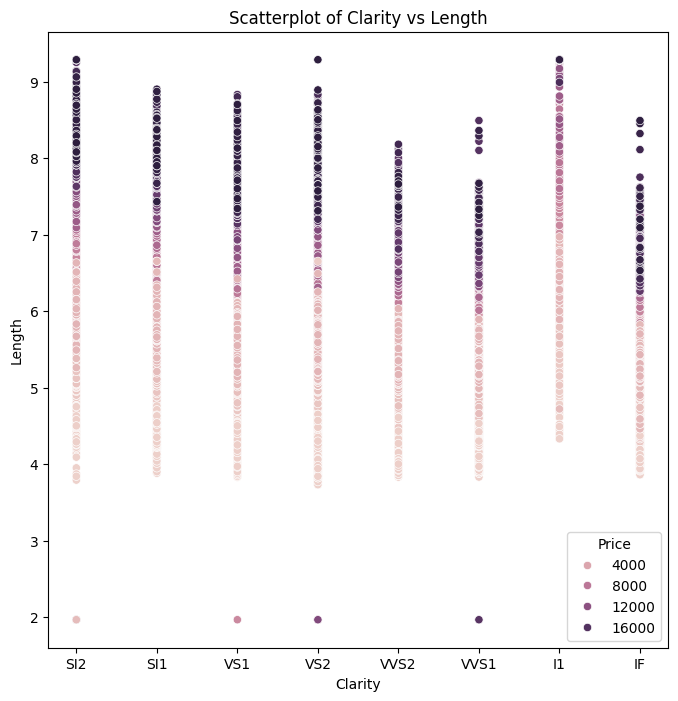

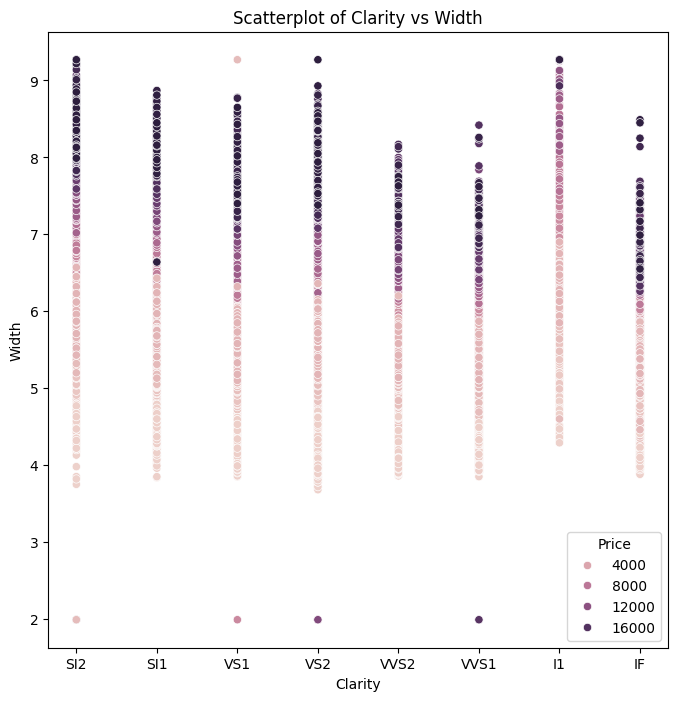

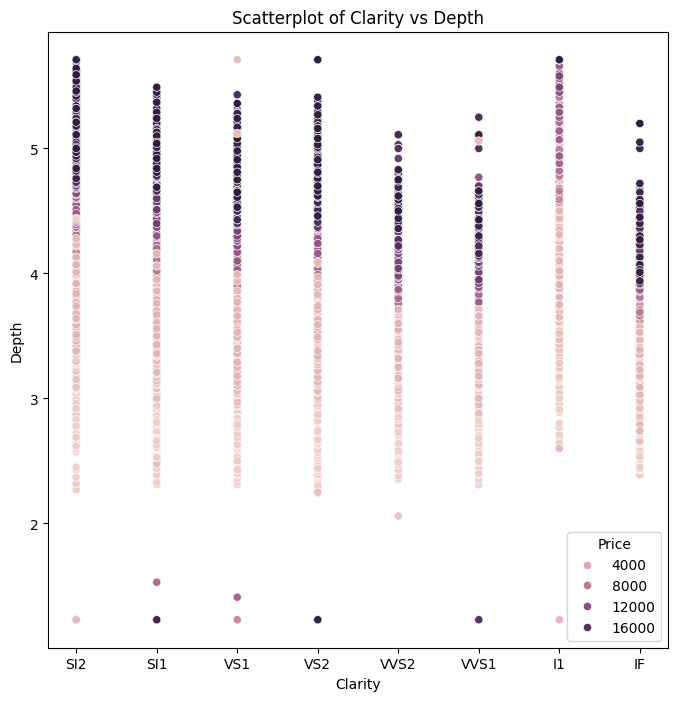

In [ ]:
for col1 in cat_cols:
  for col2 in num_cols:
    plt.figure(figsize = (8,8))
    sns.scatterplot(data = df, x = col1, y = col2, hue = 'Price' )
    plt.title(f'Scatterplot of {col1} vs {col2}')
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.show()

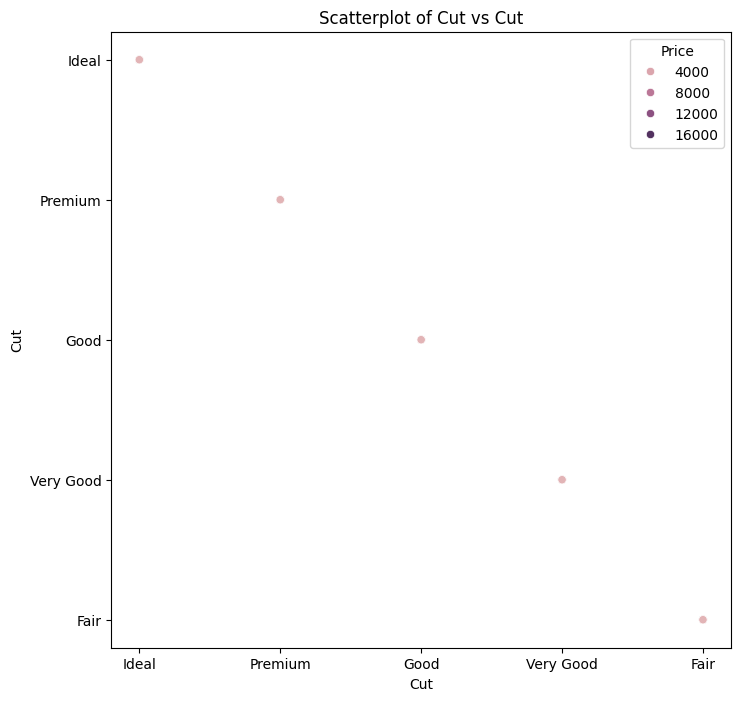

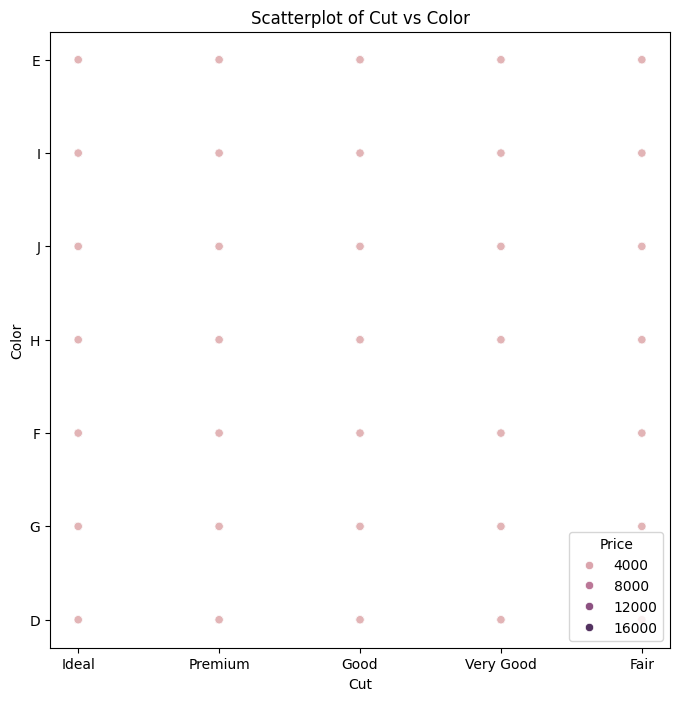

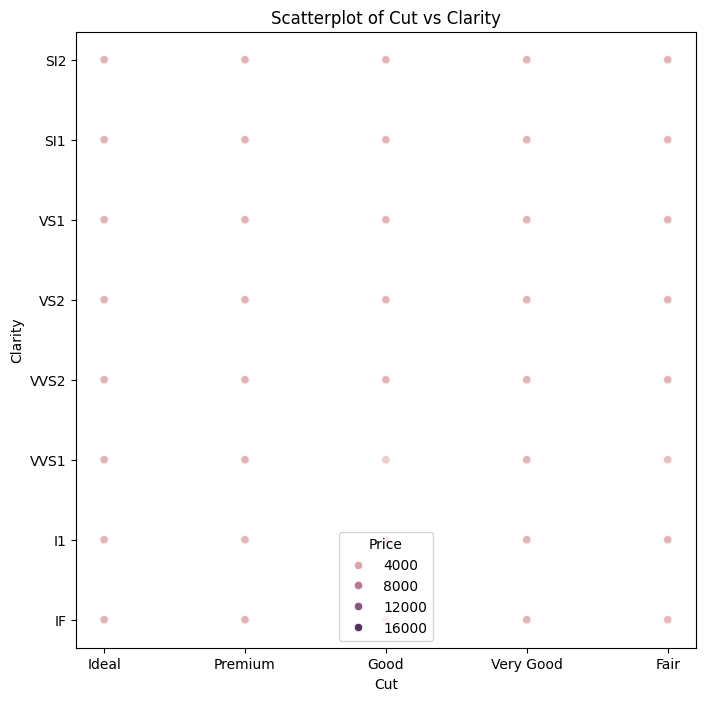

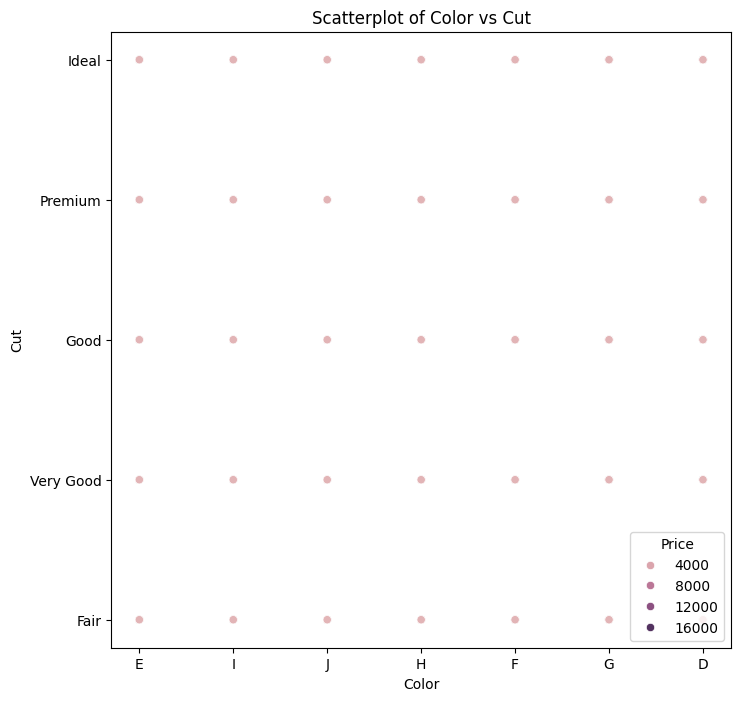

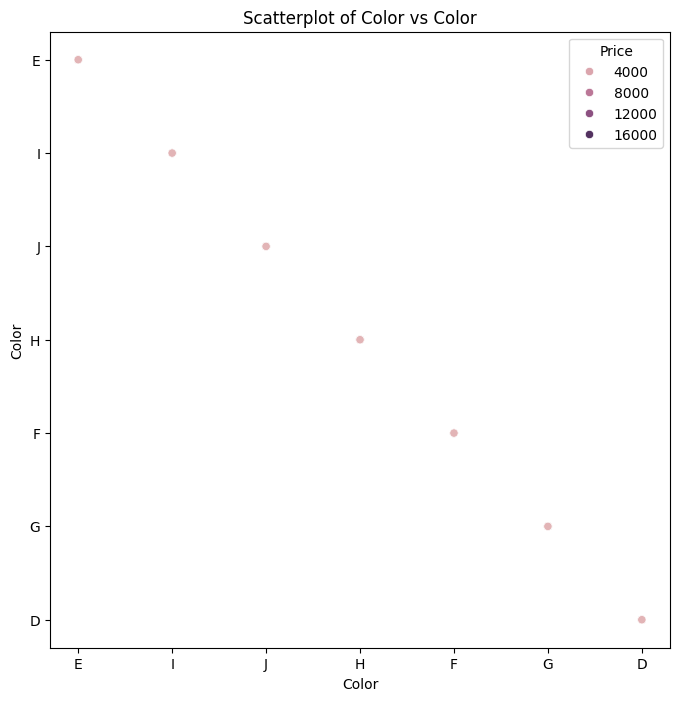

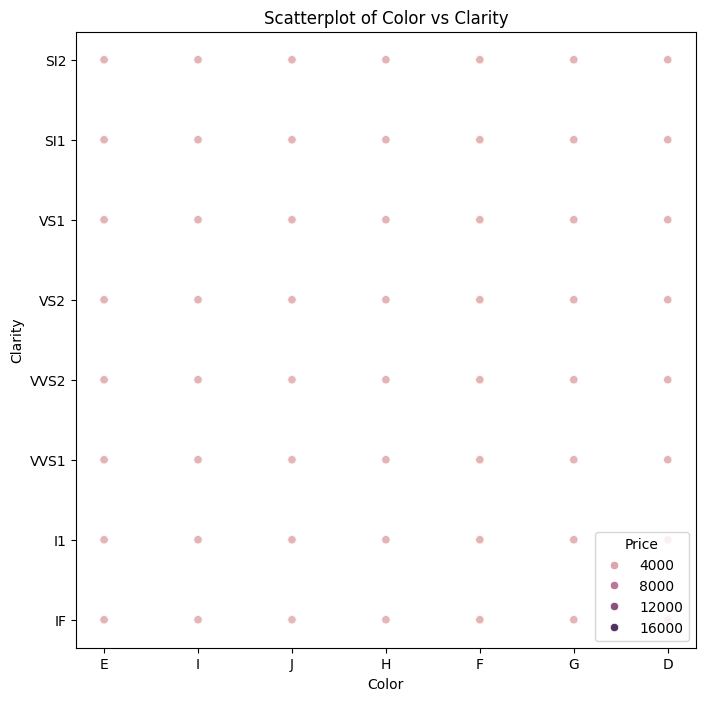

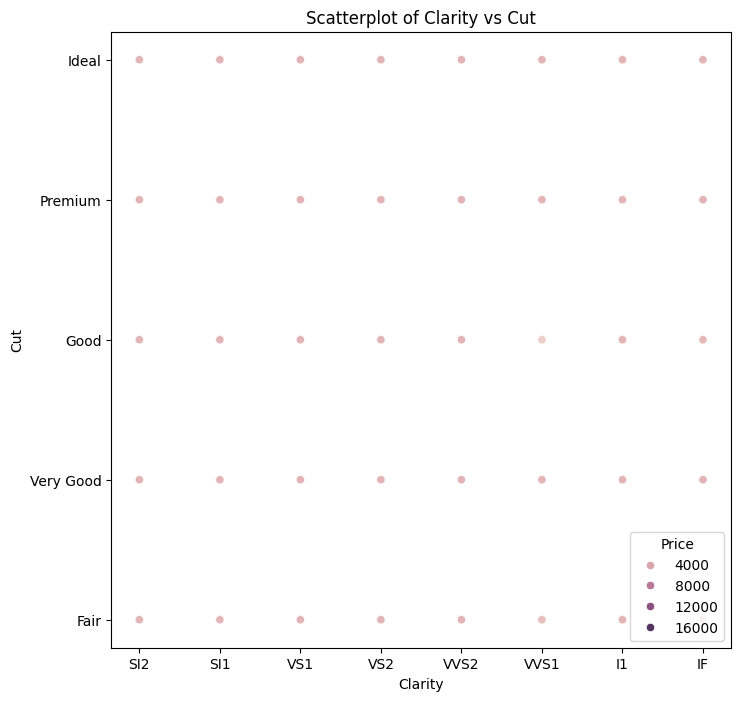

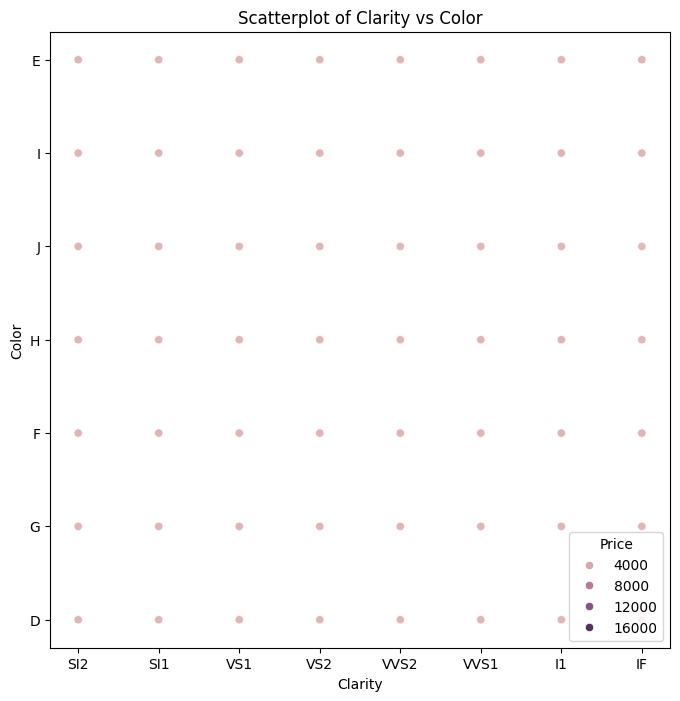

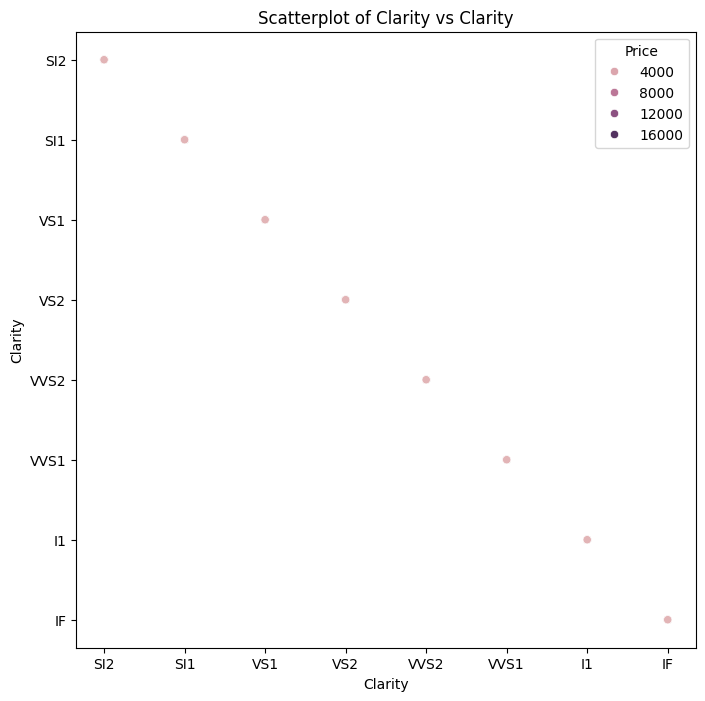

In [ ]:
for col1 in cat_cols:
  for col2 in cat_cols:
    plt.figure(figsize = (8,8))
    sns.scatterplot(data = df, x = col1, y = col2, hue = 'Price' )
    plt.title(f'Scatterplot of {col1} vs {col2}')
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.show()

###Correlation and Heatmap

In [ ]:
corr = df[num_cols].corr()
corr

Carat  Total_Depth_Percentage     Table    Length  \
Carat                   1.000000                0.021519  0.186775  0.981959   
Total_Depth_Percentage  0.021519                1.000000 -0.299939 -0.029115   
Table                   0.186775               -0.299939  1.000000  0.197725   
Length                  0.981959               -0.029115  0.197725  1.000000   
Width                   0.981231               -0.031816  0.191757  0.998357   
Depth                   0.977588                0.089743  0.157434  0.988258   

                           Width     Depth  
Carat                   0.981231  0.977588  
Total_Depth_Percentage -0.031816  0.089743  
Table                   0.191757  0.157434  
Length                  0.998357  0.988258  
Width                   1.000000  0.987882  
Depth                   0.987882  1.000000

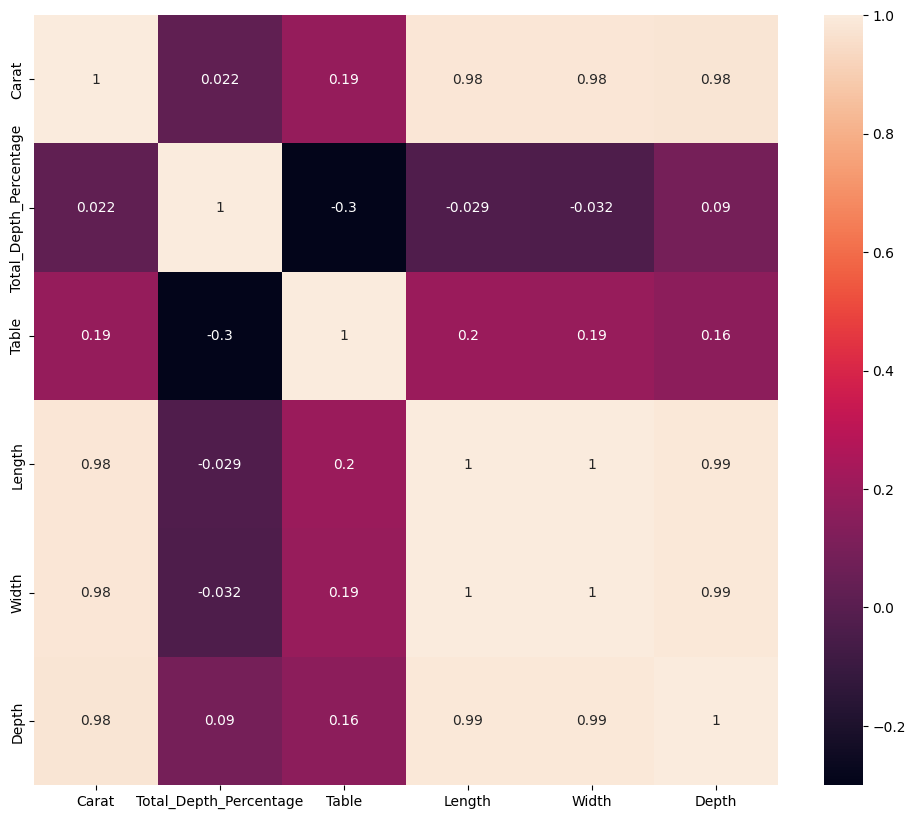

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot = True)
plt.show()

##Model Building

###Encoding

In [ ]:
for col in cat_cols:
  print(df[col].value_counts())

Cut
Ideal        21488
Premium      13748
Very Good    12069
Good          4891
Fair          1598
Name: count, dtype: int64
Color
G    11262
E     9776
F     9520
H     8272
D     6755
I     5407
J     2802
Name: count, dtype: int64
Clarity
SI1     13032
VS2     12229
SI2      9150
VS1      8156
VVS2     5056
VVS1     3647
IF       1784
I1        740
Name: count, dtype: int64


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in cat_cols:
  df[col] = le.fit_transform(df[col])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53794 entries, 0 to 53793
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Carat                   53794 non-null  float64
 1   Cut                     53794 non-null  int64  
 2   Color                   53794 non-null  int64  
 3   Clarity                 53794 non-null  int64  
 4   Total_Depth_Percentage  53794 non-null  float64
 5   Table                   53794 non-null  float64
 6   Price                   53794 non-null  int64  
 7   Length                  53794 non-null  float64
 8   Width                   53794 non-null  float64
 9   Depth                   53794 non-null  float64
dtypes: float64(6), int64(4)
memory usage: 4.1 MB


###Standardization of numerical columns

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
df[num_cols] = ss.fit_transform(df[num_cols])

In [ ]:
df

Carat  Cut  Color  Clarity  Total_Depth_Percentage     Table  Price  \
0     -1.231626    2      1        3               -0.195421 -1.128944    326   
1     -1.275419    3      1        2               -1.534394  1.647588    326   
2     -1.231626    1      1        4               -2.361406  2.804477    327   
3     -1.100245    3      5        5                0.513447  0.259322    334   
4     -1.056452    1      6        3                1.222315  0.259322    335   
...         ...  ...    ...      ...                     ...       ...    ...   
53789 -0.158687    2      0        2               -0.746763 -0.203433   2757   
53790 -0.158687    1      0        2                1.064789 -1.128944   2757   
53791 -0.202480    4      0        2                0.828500  1.184833   2757   
53792  0.147867    3      4        3               -0.589236  0.259322   2757   
53793 -0.092997    2      0        3                0.355921 -1.128944   2757   

         Length     Width     Depth  
0     -1.591834 -1.578125 -1.602213  
1     -1.645452 -1.704130 -1.775667  
2     -1.502471 -1.497122 -1.775667  
3     -1.368426 -1.353115 -1.313123  
4     -1.243317 -1.245111 -1.139669  
...         ...       ...       ...  
53789  0.016705  0.023943 -0.055583  
53790 -0.036913  0.014943  0.103416  
53791 -0.063722 -0.048060  0.031144  
53792  0.374159  0.347957  0.291325  
53793  0.088196  0.122947  0.146780  

[53794 rows x 10 columns]

###Splitting the Data

In [ ]:
X = df.drop('Price', axis = 1)
y = df['Price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 20, random_state = 42)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((53774, 9), (20, 9), (53774,), (20,))

In [ ]:
X_train.head(5)

Carat  Cut  Color  Clarity  Total_Depth_Percentage     Table  \
4028   0.454421    3      6        2                0.119632  2.110344   
5748   0.476317    3      6        7                0.749736  0.722078   
5828   0.476317    3      2        2                0.828500  0.722078   
1632   0.235454    2      4        3                0.828500 -1.128944   
28907 -0.903175    4      2        5               -0.352947 -0.203433   

         Length     Width     Depth  
4028   0.561822  0.536965  0.565960  
5748   0.651185  0.590967  0.710505  
5828   0.597567  0.563966  0.681596  
1632   0.400968  0.338957  0.464779  
28907 -0.948418 -0.930097 -0.966215

In [ ]:
y_train.head(5)

4028     3528
5748     3897
5828     3920
1632     3016
28907     685
Name: Price, dtype: int64

In [ ]:
X_test.head(5)

Carat  Cut  Color  Clarity  Total_Depth_Percentage     Table  \
43520 -0.180584    0      6        5                2.364380 -1.591699   
4264   0.235454    4      1        3               -0.589236  0.722078   
47271 -0.487138    2      3        4                0.277158 -0.666188   
44300 -0.618518    3      1        5                0.592210  1.184833   
13943  0.870458    2      5        2                0.434684 -1.128944   

         Length     Width     Depth  
43520 -0.090531 -0.183066  0.117871  
4264   0.365222  0.401959  0.320234  
47271 -0.385429 -0.363073 -0.344673  
44300 -0.582029 -0.570082 -0.518126  
13943  0.955020  0.977984  1.014049

In [ ]:
y_test.head(5)

43520    1435
4264     3584
47271    1851
44300    1590
13943    5690
Name: Price, dtype: int64

###Model Training

In [ ]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

###Prediction

In [ ]:
y_pred = rf.predict(X_test)

In [ ]:
print(y_pred)

[ 1853.36  3870.2   1872.69  1631.95  5405.61   618.16   501.67  2161.22
  1065.9   4759.22  2599.54  8791.66  5697.13  1184.7  10966.82 13666.56
  3568.17  8017.4   4596.7    985.69]


###Model Evaluation using R-squared, RMSE, and MAE

In [ ]:
print(f'R-squared: {r2_score(y_test, y_pred)}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}')
print(f'MAE {mean_absolute_error(y_test, y_pred)}')

R-squared: 0.9906091592674496
RMSE: 358.9807360221437
MAE 224.43850000000003


### Conclusion
**R-squared**:- 0.9906 -- A value this close to 1 indicates very strong model performance.


**RMSE**:- $358.98 -- Standard deviation of prediction errors. Here predictions are off by about 359

**MAE**:- $224 -- Average absolute error. Here predictions are off by about 224.


#### Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'max_features': ['auto', 'sqrt', 'log2']
}

grid = GridSearchCV(RandomForestRegressor(), param_grid, cv=3, scoring='neg_mean_squared_error')
grid.fit(X_train, y_train)
print("Best Params:", grid.best_params_)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
81 fits failed out of a total of 243.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
81 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/

Best Params: {'max_depth': 20, 'max_features': 'log2', 'min_samples_split': 2, 'n_estimators': 500}


#### Training new model

In [ ]:
best_params = grid.best_params_

best_model = RandomForestRegressor(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    max_features=best_params['max_features'],
    random_state=42
)

best_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, max_features='log2', n_estimators=500,
                      random_state=42)

In [ ]:
y_pred = best_model.predict(X_test)

####Evaluation

In [ ]:

print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE:", mean_absolute_error(y_test, y_pred))

R² Score: 0.9926896915937515
RMSE: 316.72821688508714
MAE: 218.2508994084697


### Conclusion
**R-squared**:- 0.9926 -- A value this close to 1 indicates very strong model performance.


**RMSE**:- $316.72 -- Standard deviation of prediction errors. Here predictions are off by about 316.72

**MAE**:- $218.25 -- Average absolute error. Here predictions are off by about 218.25.


**Here we can see that there is improvement in all the three evaluation metrics.**